## We fit a multinomial logistic regression with L1 penalty (Lasso) on a binary classification task. 



***You can compare this accuracy of this l1-penalized linear model with an l2-penalized logistic model or a non-linear multi-layer perceptron model on this dataset.***

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

In [ ]:
print(__doc__)

# Author: LIU Chen <liuchen@hku.hk>


Automatically created module for IPython interactive environment


## Implementation of Binary Logistic Regression from Scratch 

Dataset: CIFAR10

Target: Cat vs. Dog

Loss Function: Binary Cross-Entropy / Log Loss


Optimization: Gradient Descent 


In [ ]:

#@pysnooper.snoop()
class LogisticRegression(object):
    
    def __init__(self, X, Y):
        """
        The __init__ method is called anytime you instantiate a class. This function should take in two arguemnts:
            X: A NxD dimensional real valued numpy array represeting the covariates.
            y: A N dimensional binary valued numpy array representing the targets.
        
        """
        self.X = X
        self.N, self.D = self.X.shape
        self.Y = Y
        assert(self.Y.size == self.N) # make sure y is the appropriate size
        
        # instantiate regression parameter objects
        self.beta = np.zeros((self.D,1))
        self.bias = 0
 
    def cross_entropy(self, beta, bias):
      sigma =  expit(self.X @ beta + bias)
      sigma = np.clip(sigma, 1e-6, 1 - (1e-6)) 
      log_loss = -np.mean(self.Y*np.log(sigma) + (1-self.Y)*np.log(1-sigma)) 
      return log_loss 

    def grad_cross_entropy(self, beta, bias): 
      sigma =  expit(self.X @ beta + bias)
      sigma = np.clip(sigma, 1e-6, 1 - (1e-6)) 
      d_beta = np.dot(self.X.T, sigma - self.Y)/self.D
      d_bias = np.mean(sigma-self.Y) 
      assert(d_beta.shape == beta.shape)
      assert(d_bias.dtype == float)
      return d_beta, d_bias 

    def fit(self, step = .01, iters = 100000): 
      grad_beta, grad_bias = self.grad_cross_entropy(self.beta, self.bias) 
      entropy_loss = np.empty(iters)
      for t in range(iters):
        grad_beta, grad_bias = self.grad_cross_entropy(self.beta, self.bias)
        self.beta -= step * grad_beta 
        self.bias -= step * grad_bias 
        entropy_loss[t] = self.cross_entropy(self.beta, self.bias) 
      plt.plot(entropy_loss)
      plt.title("Optimization Routine")
      plt.xlabel("Iterations")
      plt.ylabel("Cross_Entropy")
      plt.show()
           
    def predict(self, X_test):
        """
        This function will take in some test set data "X_test" and return a predicted value
        """
        assert(X_test.shape[1] == self.D)
        Y_test = expit(X_test @ self.beta + self.bias)
        return Y_test

In [ ]:
# Data Preparation
from keras.datasets import cifar10
import numpy as np
import pandas as pd
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# let's create a dictionary that will have class names with their corresponding categorical class labels.
label_dict = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',}
index = np.where(np.in1d(y_train, [3,5])) 
y_train = y_train[index]
x_train = x_train[index]

test_index = np.where(np.in1d(y_test, [3,5])) 
y_test = y_test[test_index]
x_test = x_test[test_index]

y_train = np.array([1 if x ==3 else 0 for x in y_train]).reshape(-1, 1)
y_test = np.array([1 if x ==3 else 0 for x in y_test]).reshape(-1, 1)

x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape(-1,3072)
x_test = x_test.reshape(-1,3072)

In [ ]:
LR = LogisticRegression(X=x_train,Y=y_train)

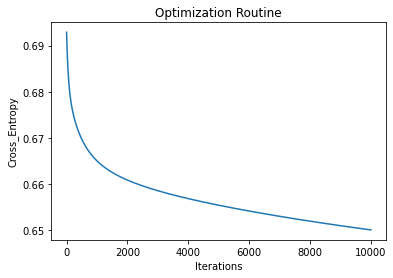

In [ ]:
LR.fit(step=.0005, iters = 10000)

In [ ]:
P_test = LR.predict(x_test)
label_test =  np.where(P_test > 0.5, 1, 0)


In [ ]:
LL = (y_test * np.log(P_test)) + ( (1.-y_test)*np.log(1.-P_test))
LL = -LL.mean()
print("Predictive Cross Entropy Error: %.2f" % LL)


Predictive Cross Entropy Error: 0.66


## Can you report the accuracy, precision, recall and F1 score on the test set? 


In [ ]:
label_test[:30]

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1]])

In [ ]:
accuracy = (y_test == label_test).sum() / y_test.shape[0]
accuracy

0.6095